In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import csv
import json
import requests
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Import ems data from csv
ems_df = pd.read_csv("EMS_DATA.csv")
ems_df = ems_df.rename(columns={"GROUP_DATE":"Date"})
ems_df.head()

,Date,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE
0,2016/01/01,4879,4.139373
1,2016/01/02,3439,4.165455
2,2016/01/03,3433,4.230702
3,2016/01/04,3707,4.241705
4,2016/01/05,3614,4.215274


In [4]:
# Import moon data from csv
moon_df = pd.read_csv("Moon_Data.csv")
del moon_df["Unnamed: 0"]
moon_df.head()

,Date,Phase
0,1/2/2016,Last Quarter
1,1/10/2016,New Moon
2,1/16/2016,First Quarter
3,1/24/2016,Full Moon
4,2/1/2016,Last Quarter


In [5]:
# Change the date to a datetime object
moon_df['DATETIME']= pd.to_datetime(moon_df['Date'])
moon_df= moon_df.astype({'DATETIME': 'datetime64'})
moon_df['Date']= moon_df['DATETIME'].dt.strftime("%Y/%m/%d")
moon_df.head()

,Date,Phase,DATETIME
0,2016/01/02,Last Quarter,2016-01-02
1,2016/01/10,New Moon,2016-01-10
2,2016/01/16,First Quarter,2016-01-16
3,2016/01/24,Full Moon,2016-01-24
4,2016/02/01,Last Quarter,2016-02-01


In [6]:
# Merge tables
darkside = pd.merge(ems_df, moon_df, on="Date", how="left")

#Clean up table
darkside = darkside.rename(columns={"INITIAL_SEVERITY_LEVEL_CODE":"Avg. Initial Severity Level", "INCIDENT_DATETIME":"Incident Count"})
darkside.head()

,Date,Incident Count,Avg. Initial Severity Level,Phase,DATETIME
0,2016/01/01,4879,4.139373,NaN,NaT
1,2016/01/02,3439,4.165455,Last Quarter,2016-01-02
2,2016/01/03,3433,4.230702,NaN,NaT
3,2016/01/04,3707,4.241705,NaN,NaT
4,2016/01/05,3614,4.215274,NaN,NaT


In [8]:
darkside['full_moon'] = np.where(darkside['Phase']=='Full Moon', 1, 0)
#darkside.drop('DATETIME', axis=1, inplace=True)
#darkside.drop('GROUP_DATE', axis=1, inplace=True)
darkside.head()

,Date,Incident Count,Avg. Initial Severity Level,Phase,DATETIME,full_moon
0,2016/01/01,4879,4.139373,NaN,NaT,0
1,2016/01/02,3439,4.165455,Last Quarter,2016-01-02,0
2,2016/01/03,3433,4.230702,NaN,NaT,0
3,2016/01/04,3707,4.241705,NaN,NaT,0
4,2016/01/05,3614,4.215274,NaN,NaT,0


In [9]:
moon_phases = darkside.groupby(['Phase'], as_index=True).agg({'Incident Count': 'mean', 'Avg. Initial Severity Level': 'mean'})
moon_phases

,Incident Count,Avg. Initial Severity Level
Phase,,
First Quarter,4013.864865,4.255848
Full Moon,4050.162162,4.243772
Last Quarter,4103.789474,4.254295
New Moon,4027.081081,4.259100


<IPython.core.display.Javascript object>


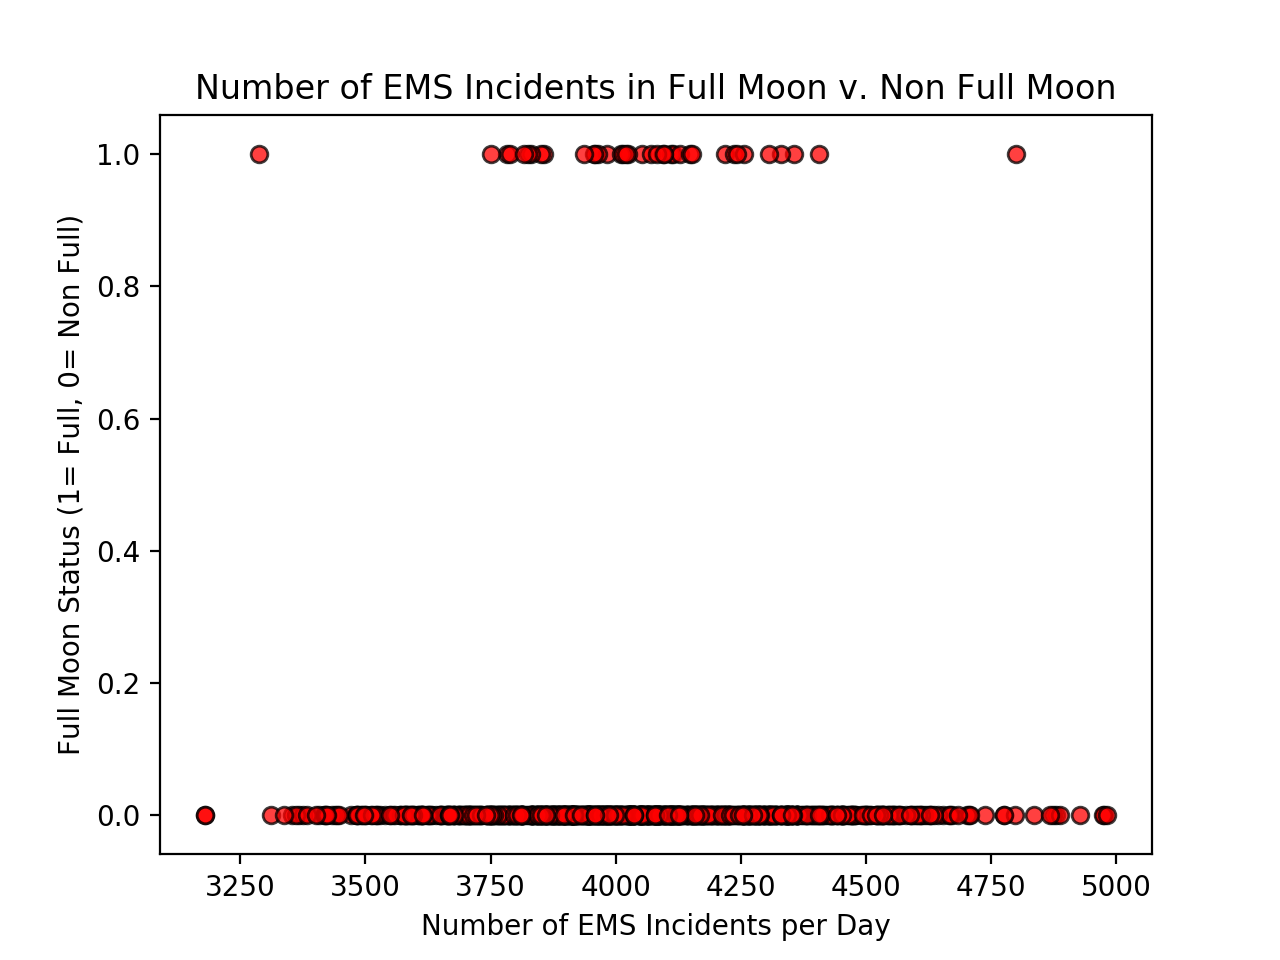

In [10]:
x_axis = darkside['Incident Count']
y_axis = darkside['full_moon']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)


In [11]:
plt.title("Number of EMS Incidents in Full Moon v. Non Full Moon")
plt.xlabel("Number of EMS Incidents per Day")
plt.ylabel("Full Moon Status (1= Full, 0= Non Full)")

Text(85.06944444444443, 0.5, 'Full Moon Status (1= Full, 0= Non Full)')

In [12]:
plt.savefig("EMS Incident v Full Moon Plot")

<IPython.core.display.Javascript object>


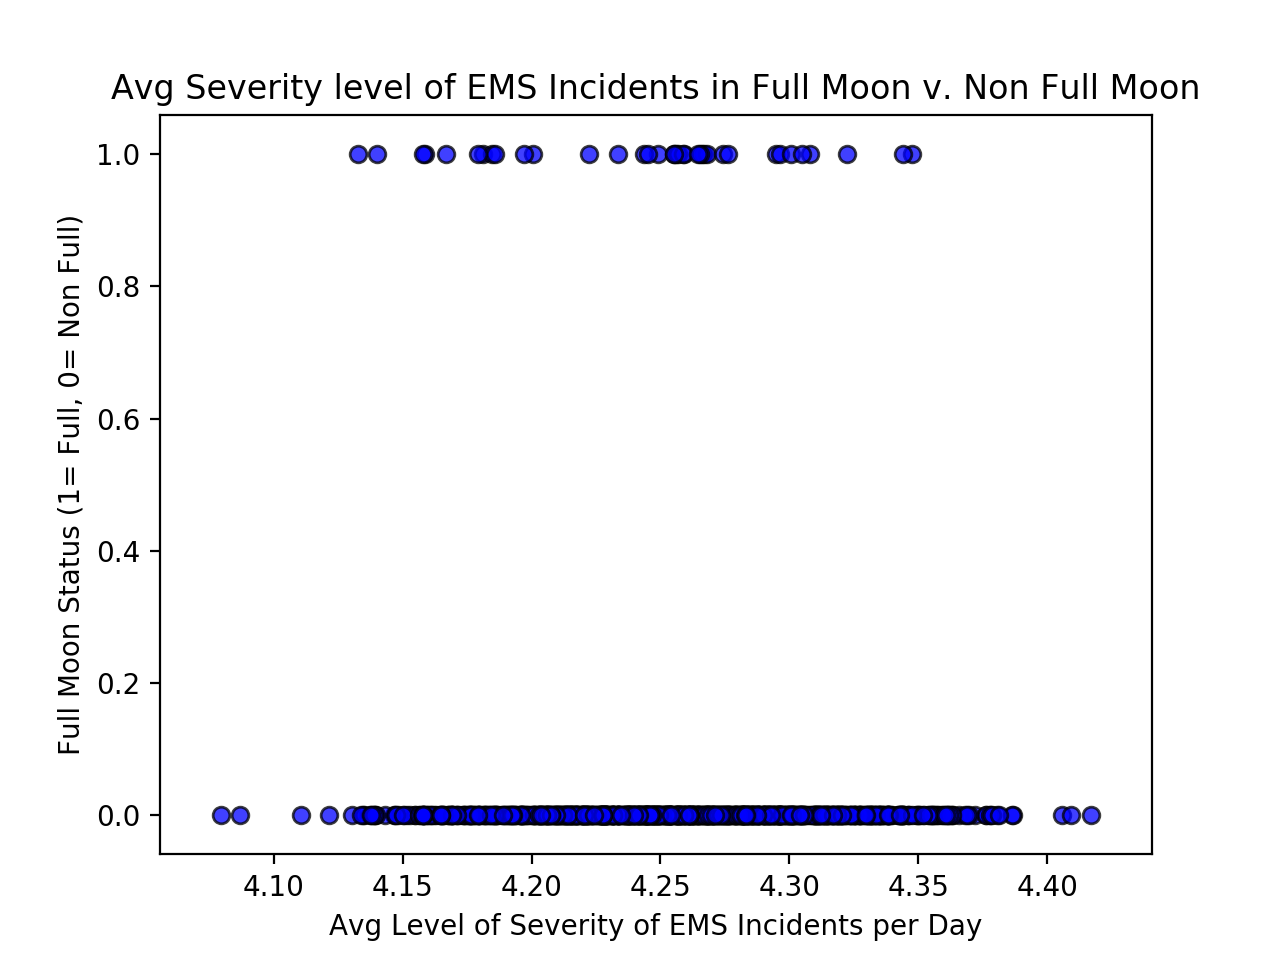

Text(0, 0.5, 'Full Moon Status (1= Full, 0= Non Full)')

In [14]:
avg_sev = darkside['Avg. Initial Severity Level']
full_moon= darkside['full_moon']
plt.scatter(avg_sev, full_moon, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Avg Severity level of EMS Incidents in Full Moon v. Non Full Moon")
plt.xlabel("Avg Level of Severity of EMS Incidents per Day")
plt.ylabel("Full Moon Status (1= Full, 0= Non Full)")


<IPython.core.display.Javascript object>


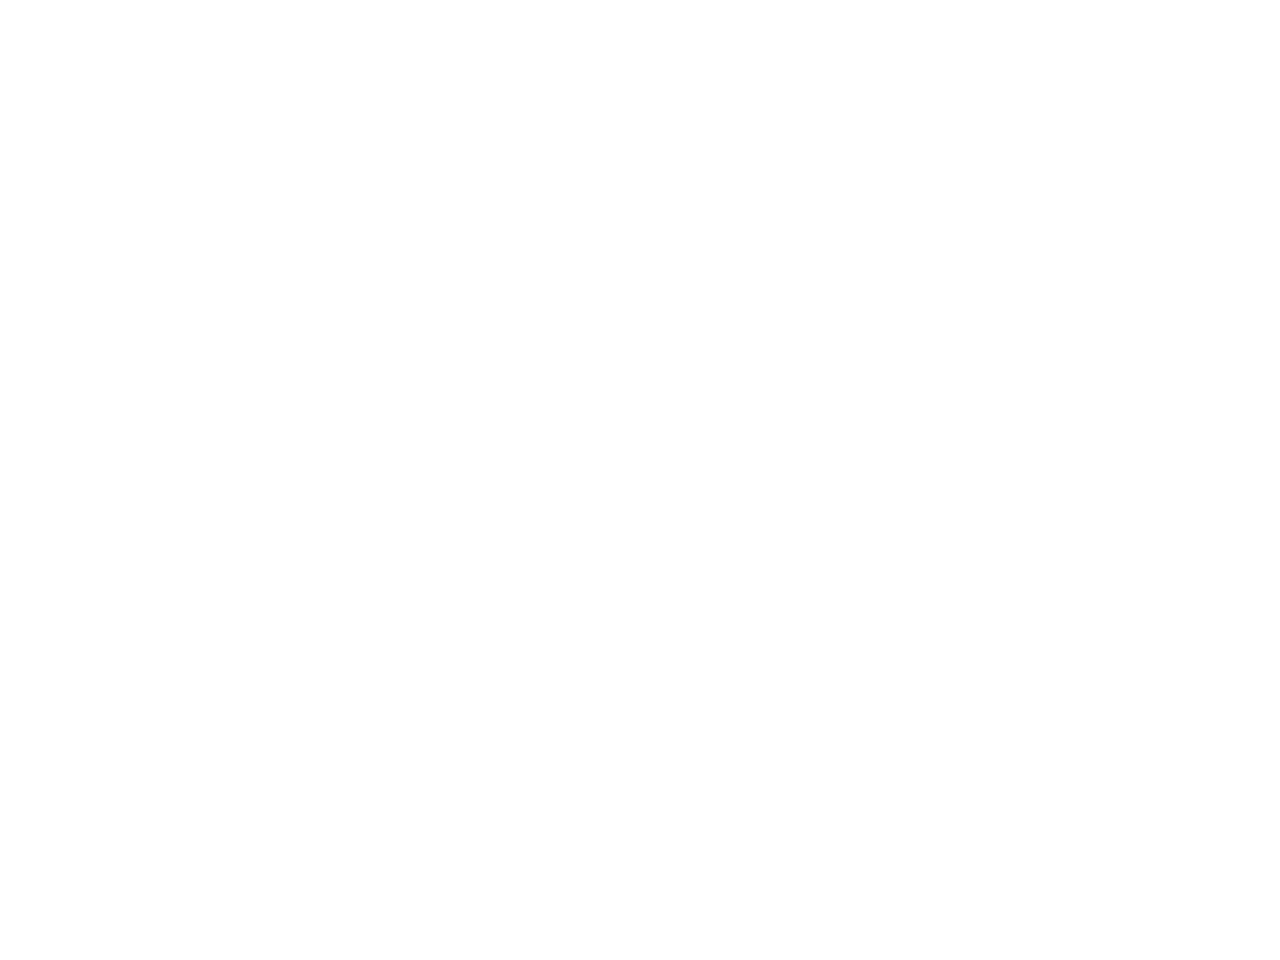

In [17]:
plt.savefig("EMS_Avg._Severity_Level_v_Full_Moon_Plot.png")